In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Increase the print output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:


# Read in the data
fullRaw = pd.read_csv("HeartDisease.csv")

In [3]:
fullRaw.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### BASIC DATA CHECKS/ QUALITY CHECKS

In [4]:
# Check the total rows
print(fullRaw.shape)

# Check the data types for variables
fullRaw.dtypes

(303, 14)


age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [5]:
# Int/Float to Categorical

fullRaw[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']] = \
fullRaw[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']].\
        astype("object")
fullRaw.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

### RANDOM SAMPLING

In [6]:
# Randomly Sample Raw Data into Training and Testing. train_test_split() is used for random sampling

trainRaw, testRaw = train_test_split(fullRaw, train_size=0.75, random_state = 150)
# random_state ensures reproducibility of same random results. Any number of your choice would work, I have taken 150.

print(trainRaw.shape)
print(testRaw.shape)

(227, 14)
(76, 14)


In [7]:
# Create Source Column in all the datasets. It helps in keeping track of which rows belong to which source of data.

trainRaw = trainRaw.copy()
testRaw = testRaw.copy()

trainRaw["Source"] = "Train"
testRaw["Source"] = "Test"

In [8]:
trainRaw.head()
# testRaw.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,Source
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,Train
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1,Train
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1,Train
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,Train
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,Train


In [9]:
# Combine Train, Test, Prediction
fullRaw = pd.concat([trainRaw, testRaw], axis = 0)
fullRaw.shape

(303, 15)

In [10]:
fullRaw.head()
# fullRaw.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target,Source
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,Train
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1,Train
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1,Train
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,Train
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,Train


### EDA

#### Data Summarization

In [11]:
# Summarize the dependent variable

# Check the count
print(trainRaw["target"].value_counts())

# Convert the count to percentage
round(trainRaw["target"].value_counts()/ trainRaw.shape[0], 2)*100

# About 55% of the people in the training data have got a heart disease

1    125
0    102
Name: target, dtype: int64


1    55.0
0    45.0
Name: target, dtype: float64

In [12]:
trainRaw.shape

(227, 15)

In [13]:
# Summarize the data (continuous variables)
trainRaw.describe()

,age,rest_bps,cholestrol,thalach,old_peak,target
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,54.678414,132.246696,246.418502,149.590308,1.089427,0.550661
std,8.712600,17.536080,49.700752,22.098823,1.217379,0.498526
min,29.000000,94.000000,131.000000,71.000000,0.000000,0.000000
25%,49.000000,120.000000,212.000000,136.500000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,154.000000,0.800000,1.000000
75%,61.000000,140.000000,275.000000,165.000000,1.800000,1.000000
max,76.000000,200.000000,417.000000,202.000000,6.200000,1.000000


In [14]:
# Summarize the data (categorical variables)
trainRaw.describe(include = "object")

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia,Source
count,227,227,227,227,227,227,227,227,227
unique,2,4,2,3,2,3,5,4,1
top,1,0,0,1,0,1,0,2,Train
freq,151,103,194,126,151,104,139,124,227


#### Impact Analysis Using Boxplot: Continuous Independent Variables on Categorical Dependent Variable

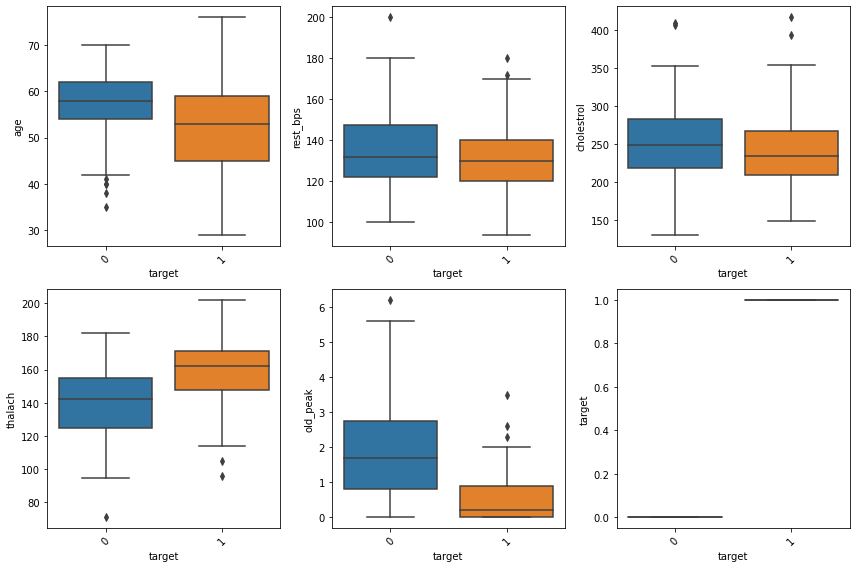

In [15]:
continuousVars = trainRaw.columns[trainRaw.dtypes != object]

fig, ax = plt.subplots(2, 3, figsize = (12,8)) 

for variable, subplot in zip(continuousVars, ax.flatten()): # ax.faltten() to get a flat array of 2*3 elements (6 plots in all)
    
    plot  = sns.boxplot(x = trainRaw["target"], y = trainRaw[variable], ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.tight_layout(); # This will space out the individuals plots in an appropriate manner


#### Impact Analysis Using Proportions: Categorical Independent Variables on Categorical Dependent Variable

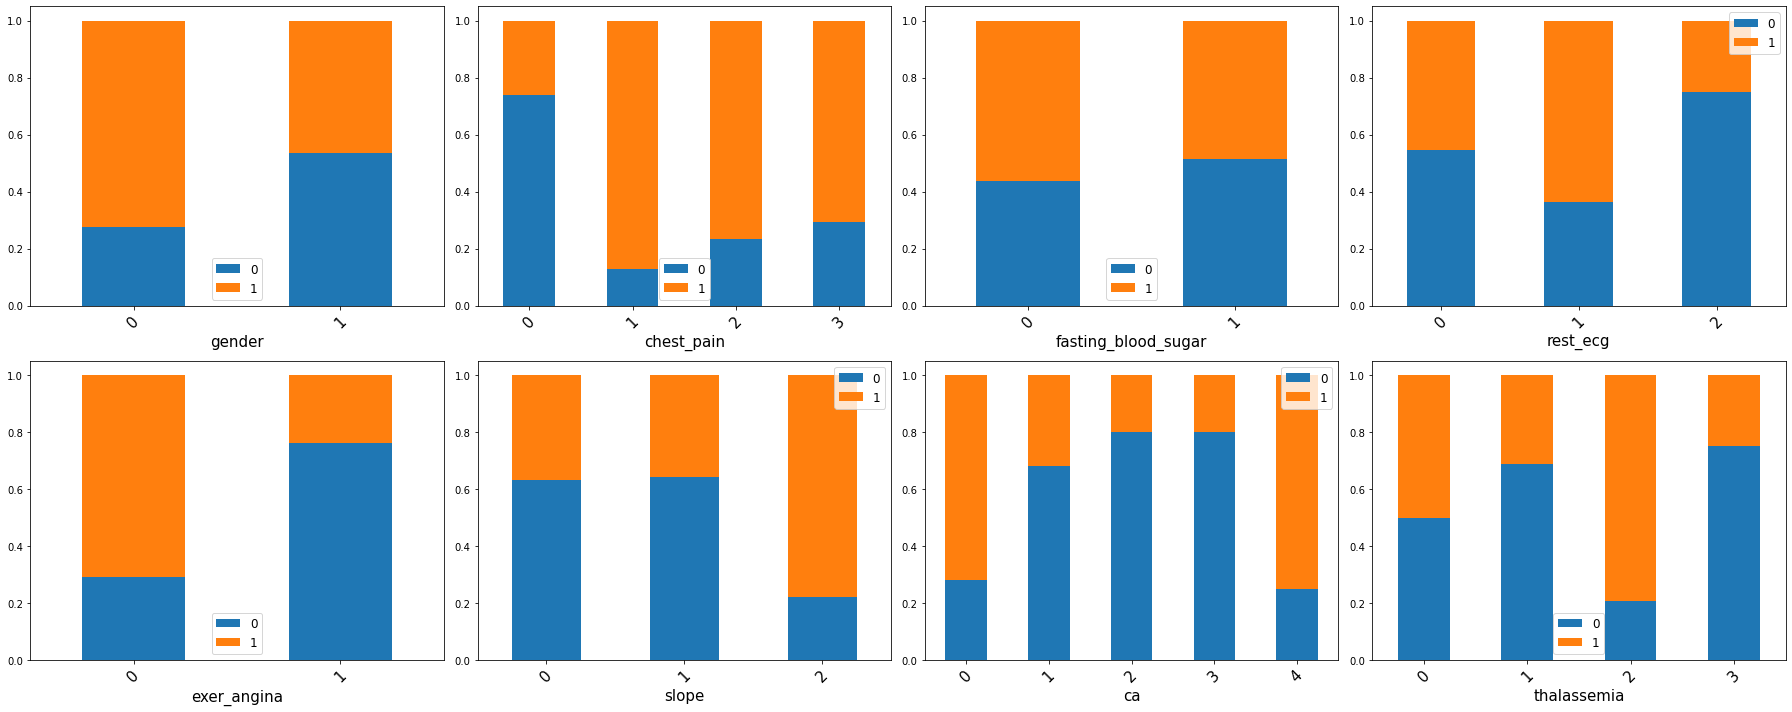

In [16]:
categoricalVars = trainRaw.columns[trainRaw.dtypes == object]

fig, ax = plt.subplots(2, 4, figsize = [25,10]) # Rows, Columns | figsize: Width, Height

for variable, subplot in zip(categoricalVars, ax.flatten()): # ax.faltten() to get a flat array of 2*4 elements (8 plots in all)
    
    df1 = pd.crosstab(index = trainRaw[variable], columns = trainRaw["target"], margins = 1)
    df1.drop(index = "All", axis = 0, inplace = True)
    df1 = df1.div(df1["All"], axis = 0)
    df1.drop("All", axis = 1, inplace = True)
    
    plot = df1.plot(kind='bar', stacked=True, ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize = 15)
    plot.set_xlabel(variable, fontsize = 15) # Increase the fontsize of variable names in each plot
    plot.legend(prop={'size': 12}) # prop is property dictionary

plt.tight_layout();

### DATA PREPARATION

In [17]:
# Lets create dummy variables out of the categorical variables

fullRaw2 = pd.get_dummies(fullRaw).copy() # 'Source'  column will change to "Source_Train" and "Source_Test"
# We need not drop the "nth" category in ML models as they dont get impacted by multicollinearity.
# Also, decision tree logic picks a variable in one-by-one manner. Hence, its important to inlcude all possible variables.

print(fullRaw2.shape)
fullRaw2.head()

(303, 33)


,age,rest_bps,cholestrol,thalach,old_peak,target,gender_0,gender_1,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_0,fasting_blood_sugar_1,rest_ecg_0,rest_ecg_1,rest_ecg_2,exer_angina_0,exer_angina_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,Source_Test,Source_Train
272,67,120,237,71,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
26,59,150,212,157,1.6,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
114,55,130,262,155,0.0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
175,40,110,167,114,2.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
161,55,132,342,166,1.2,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1


### SAMPLING

#### Divide the full dataset into train and test

In [19]:
# Step 2: Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

dependentVar = 'target'
trainX = Train.drop([dependentVar], axis = 1).copy()
trainY = Train[dependentVar].copy()
testX = Test.drop([dependentVar], axis = 1).copy()
testY = Test[dependentVar].copy()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(227, 30)
(227,)
(76, 30)
(76,)


### MODEL BUILDING

#### Build Model (Iteration 1/ Trial 1: Build the model with default tuning parameter values)

In [20]:
M1 = DecisionTreeClassifier(random_state=123)
M1 = M1.fit(trainX, trainY) # Indep, Dep

#### Visualize Model

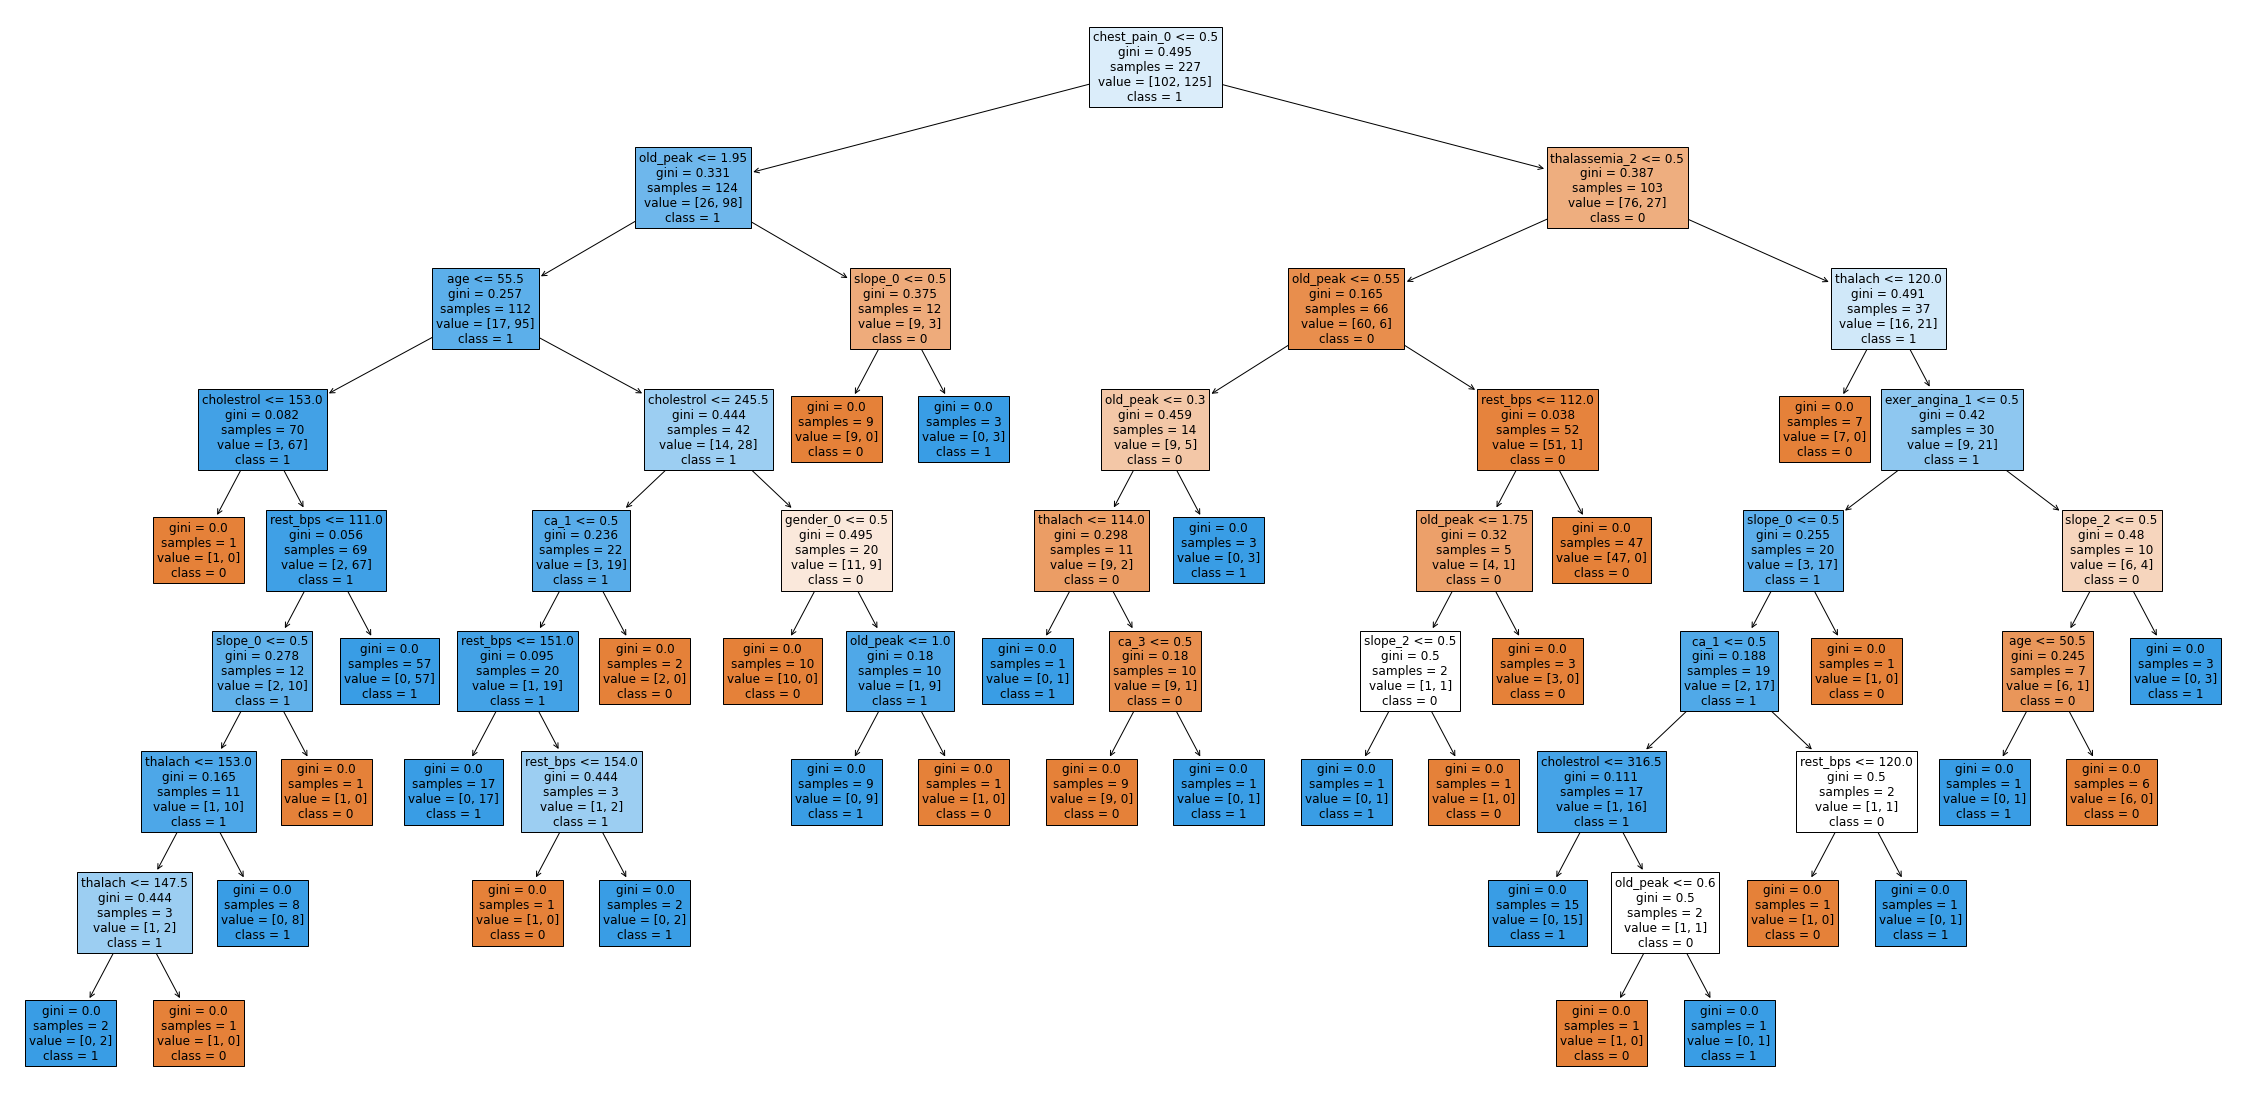

In [21]:
plt.figure(figsize=(40,20)) # Width, Height
plot_tree(M1, fontsize = 12, feature_names = trainX.columns, filled = True, class_names = ["0","1"]);
# filled = True allows the method to use colors to indicate the majority of the class
# class_names = ["0","1"] allows the method to provide the dependent variable "MAJORITY" class name for each of colored boxes

# If you would like to save it to a file
plt.savefig("C:\\Users\\rahul\\Documents\\IMR\\PGDA\\Datasets\\Decision_Tree\\DT_M1.pdf", format = "pdf")

#### Model Prediction on Testset

In [22]:
testPredDf = pd.DataFrame()

testPredDf['Prediction'] = M1.predict(testX)

# Create a column to store actuals
testPredDf["Actual"] = testY.values

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,1,0
1,1,1
2,1,0
3,1,1
4,0,1


In [23]:
# Confusion Matrix
confusionMatrix = pd.crosstab(testPredDf["Actual"], testPredDf['Prediction']) # R, C format
confusionMatrix

Prediction,0,1
Actual,,
0,26,10
1,12,28


In [24]:
# Accuracy
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100 # ~71%

71.05263157894737

In [25]:
# Precision, Recall, F1-Score (For 1s)
print("F1-Score: ", f1_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted
print("Precision: ", precision_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted

F1-Score:  0.717948717948718
Precision:  0.7368421052631579
Recall:  0.7


#### Predict on Trainset (To detect Overfitting)

In [27]:
trainPredDf = pd.DataFrame()

trainPredDf['Prediction'] = M1.predict(trainX)

# Create a column to store actuals
trainPredDf["Actual"] = trainY.values

# Validate if the above worked
trainPredDf.head()

,Prediction,Actual
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [29]:
confusionMatrix = pd.crosstab(trainPredDf["Actual"], trainPredDf['Prediction']) # R, C format
confusionMatrix

Prediction,0,1
Actual,,
0,102,0
1,0,125


In [31]:
# Accuracy
(sum(np.diagonal(confusionMatrix))/trainX.shape[0])*100 # 100%

100.0

In [32]:
M2 = DecisionTreeClassifier(random_state=123, min_samples_leaf = 10)
M2 = M2.fit(trainX, trainY) # Indep, Dep

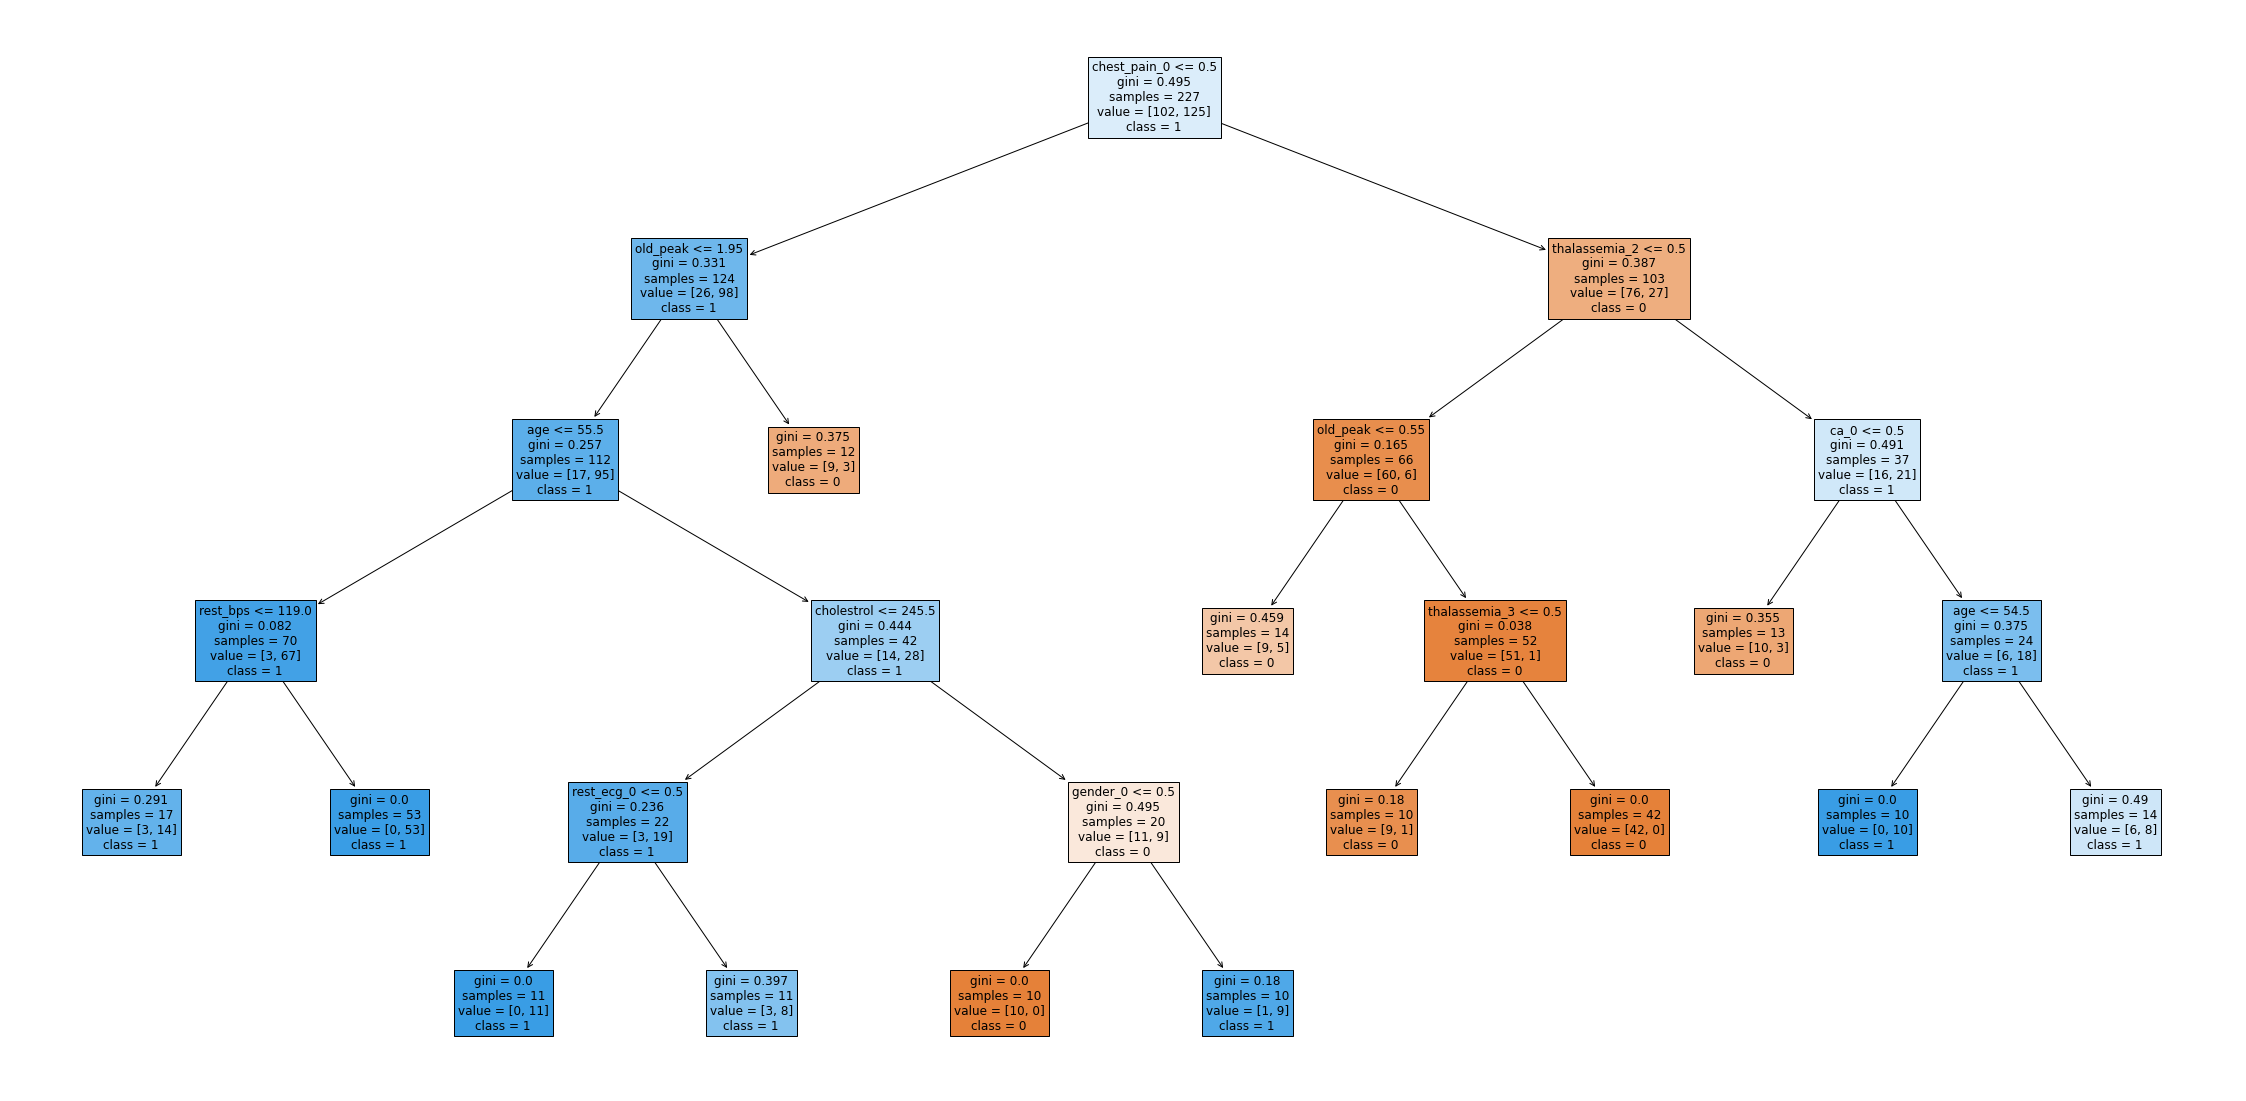

In [33]:
plt.figure(figsize=(40,20)) # Width, Height
plot_tree(M2, fontsize = 12, feature_names = trainX.columns, filled = True, class_names = ["0","1"]);
# filled = True allows the method to use colors to indicate the majority of the class
# class_names = ["0","1"] allows the method to provide the dependent variable "MAJORITY" class name for each of colored boxes

# If you would like to save it to a file
plt.savefig("C:\\Users\\rahul\\Documents\\IMR\\PGDA\\Datasets\\Decision_Tree\\DT_M2.pdf", format = "pdf")

In [34]:
testPredDf = pd.DataFrame()
testPredDf['Prediction'] = M2.predict(testX)
testPredDf["Actual"] = testY.values

In [35]:
# Confusion Matrix
confusionMatrix = pd.crosstab(testPredDf["Actual"], testPredDf['Prediction']) # R, C format
confusionMatrix

Prediction,0,1
Actual,,
0,30,6
1,8,32


In [36]:
# Accuracy
(sum(np.diagonal(confusionMatrix))/testX.shape[0])*100 # ~82% # Better than M1 with a better tree representation!

81.57894736842105

#### Predict on Trainset (To detect Overfitting)

In [37]:
trainPredDf = pd.DataFrame()

trainPredDf['Prediction'] = M2.predict(trainX)

# Create a column to store actuals
trainPredDf["Actual"] = trainY.values

# Validate if the above worked
trainPredDf.head()

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [38]:
confusionMatrix = pd.crosstab(trainPredDf["Actual"], trainPredDf['Prediction']) # R, C format
confusionMatrix

Prediction,0,1
Actual,,
0,89,13
1,12,113


In [39]:
# Accuracy
(sum(np.diagonal(confusionMatrix))/trainX.shape[0])*100 #

88.98678414096916

In [40]:
# Precision, Recall, F1-Score
print("F1-Score: ", f1_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted
print("Precision: ", precision_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted
print("Recall: ", recall_score(testPredDf["Actual"], testPredDf['Prediction'])) # Actual, Predicted

F1-Score:  0.8205128205128205
Precision:  0.8421052631578947
Recall:  0.8
